## Regions

subset of discrete plane: $R \subseteq \mathbb{Z} ^{2}$

$\chi_R(r,c) = 1$ for $(r,c)^T \in R$

regions as binary picture

#### Problem: inefficient memory usage: $O(wh)$ at least width * height

#### Solution: store runs of each row (Sehnen)
- store beginning and end of each run
- sort runs (row, beginning column)

- restrict operations to regions of interest (ROI) (Definitionsbereiche)
- processing only on one ROI
- image object (Bildobject) consists of region and an arbitrary number of gray scale channels, e.g. 3 for colored images

## Global Thresholding (Schwellwertoperation)

- simplest and most common segmentation algorithm


- $ S = \{(r,c)^T \in R \mid  g_{min} \leq f_{r,c} \leq g_{max} \} $


- Problem:
    - if illumination changes over the image (Helligkeitsverlauf): Shading-Correction (Shading-Korrektur)
    - if illumination or appearance of object changes: Contrast normalisation, brightness adjustment
    
### Other possibility to determine threshold (Schwellwerte)
- histogram of the picture
- assumption: object and background are significantly different
    - two maxima should be visible one of the being the background and the other being the object
    
- problem: multiple minima exist, not clear which one we're looking for
- smoothen the histogram

original picture


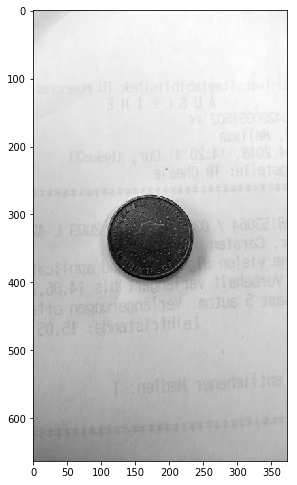

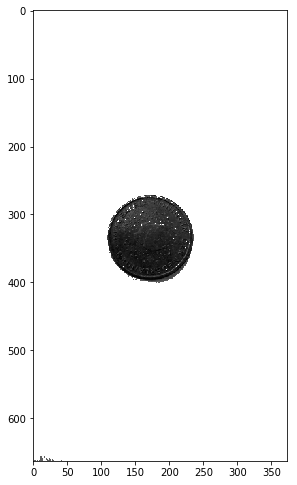

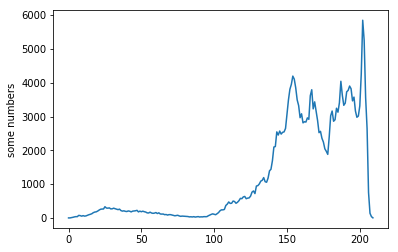

In [4]:
import img_reader as rd
import numpy as np

img = rd.read_gray("images/03-coin.jpg")
print("original picture")
rd.show_img(img)

img2 = np.array(img)
#img2[img2 < 60] = 0
img2[img2 >= 100] = 255
rd.show_img(img2)
rd.show_histo(img)

### Problem: Not evenly lit
- find better background or more distinct coin

original picture


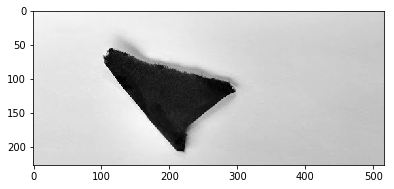

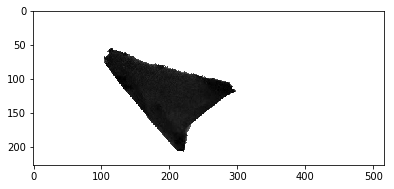

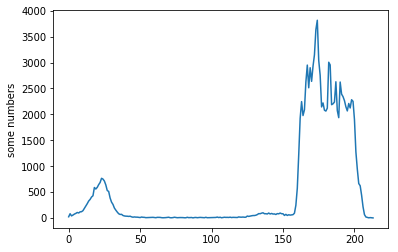

smoothen histogram


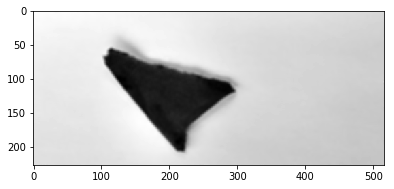

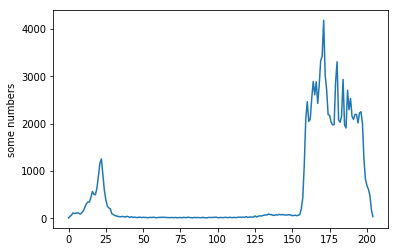

In [2]:
import img_reader as rd
import numpy as np

img = rd.read_gray("images/03-cloth.jpg")
print("original picture")
rd.show_img(img)

img2 = np.array(img)
#img2[img2 < 60] = 0
img2[img2 >= 100] = 255
rd.show_img(img2)
rd.show_histo(img)

img_smooth = rd.get5x5_mean(img)
print("smoothen histogram")
rd.show_img(img_smooth)
rd.show_histo(img_smooth)

### Better, but illumination far from being optimal

## Dynamic Thresholding

Problem
- sometimes no global threshold exists
- no common background

Solution
- determine local background via smoothening operations (Glättungsoperatoren)
- e.g. mean filter, Gaussian filter